# Churn Telecom dataset

Description of dataset: Each row represents a customer; each column contains customer’s attributes.
The datasets have the following attributes or features:

* State: string - U.S. state where the customer lives
* Account length: integer - Number of days the customer has been with the company
*  Area code: integer -Telephone area code
*  International plan: string - if the customer has international plan
* Voice mail plan: string - if customer has voice mail plan  
* Number vmail messages: integer - Number of voice mail messages.
* Total day minutes: double - Total minutes of calls during the daytime.
* Total day calls: integer - Number of calls made during the daytime.
* Total day charge: double- Charges in USD for daytime calls.
* Total eve minutes: double - Total minutes of calls during the evening.
* Total eve calls: integer- Number of calls made during the evening.
* Total eve charge: double - Charges in USD for evening calls.
* Total night minutes: double - Total minutes of calls during the nighttime.
* Total night calls: integer - Number of calls made during the nighttime.
* Total night charge: double - Charges in USD for nighttime calls.
* Total intl minutes: double- Total minutes of international calls.
* Total intl calls: integer - Number of international calls made.
* Total intl charge: double- Charges in USD for international calls.
* Customer service calls: integer- Number of times the customer contacted customer service.
* Churn: string - Customer churn status (1 = churned, 0 = stayed).

In [1]:
# libraries imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/churn.csv')
print(data.shape)
data.head()

(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Cleaning null values if it is needed
print("Null values for each column\n")
print(data.isnull().sum())
print("\nColumn data type\n")
print(data.info())


Null values for each column

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

Column data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   In

In [4]:
#trnasform of data to improve analysis
data['Area code'] = data['Area code'].astype(str)
data['State'] = data['State'].astype('category')
data['International plan'] = data['International plan'].map({'Yes': 1, 'No': 0})
data['Voice mail plan'] = data['Voice mail plan'].map({'Yes': 1, 'No': 0})
data['Churn'] = data['Churn'].map({True: 1, False: 0})

In [5]:
#get minimum, maximum, mean and statistical values to identify if exists any data that could be outliers or not possible value
print("Data value counts\n")
print(data['Area code'].value_counts())
print(data['International plan'].value_counts())
print(data['Voice mail plan'].value_counts())
print(data['Churn'].value_counts())
print("\nStatical values\n")
df=data.drop(['State','Area code','International plan','Voice mail plan', "Customer service calls",'Churn'],axis=1)
print(df.describe())


Data value counts

Area code
415    1318
510     679
408     669
Name: count, dtype: int64
International plan
0    2396
1     270
Name: count, dtype: int64
Voice mail plan
0    1933
1     733
Name: count, dtype: int64
Churn
0    2278
1     388
Name: count, dtype: int64

Statical values

       Account length  Number vmail messages  Total day minutes  \
count     2666.000000            2666.000000         2666.00000   
mean       100.620405               8.021755          179.48162   
std         39.563974              13.612277           54.21035   
min          1.000000               0.000000            0.00000   
25%         73.000000               0.000000          143.40000   
50%        100.000000               0.000000          179.95000   
75%        127.000000              19.000000          215.90000   
max        243.000000              50.000000          350.80000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      2666.000000      

**Interpretation and analysis:**

Account lenght data give us the maximum and minimum days that the customer belongs to the company, the maximum is about 243 dyas meanwhile the minimum is 0, this is probably a mistake in the records, because we can analyse the customer, and a person who has 0 days recorded in account lenght means that person is not a customer yet. The average or mean is 100 days with a standard deviation of 39.5 days, which is a large variation between the data, in addition to the fact that 50% of the central data is between 73 and 127 days. To gain a better understanding of how much data falls within at least 95%, the 2.5 and 97.5 quantiles could be established, or the empirical rule could be used if a normal distribution is followed.

In terms of total minutes during the day, evening, night, and international calls, we can see that on average more minutes are spent during the night and evening (201 and 200 minutes, respectively), while international calls represent a very small proportion of the minutes used. Likewise, the standard deviation for daytime, evening, and nighttime is around 50 minutes, so there is the same variability in the data. The maximum minutes recorded are 395, which belong to the nighttime, while the minimum is 0, which may be an error or indicate that the call lasted only a few seconds.

# Visual Analysis

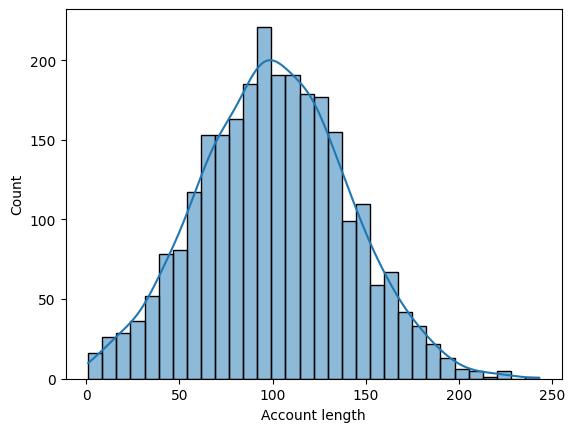

In [6]:
sns.histplot(data=data, x='Account length', kde=True)
plt.show()


We can see that in terms of account length, it follows a normal pattern, but it has a slight asymmetry to the right, where the left tail is larger, and we can even see some values that are likely to be outliers. The concentration of the data described above can be seen more visually to verify this.

<Axes: xlabel='Total day charge', ylabel='Count'>

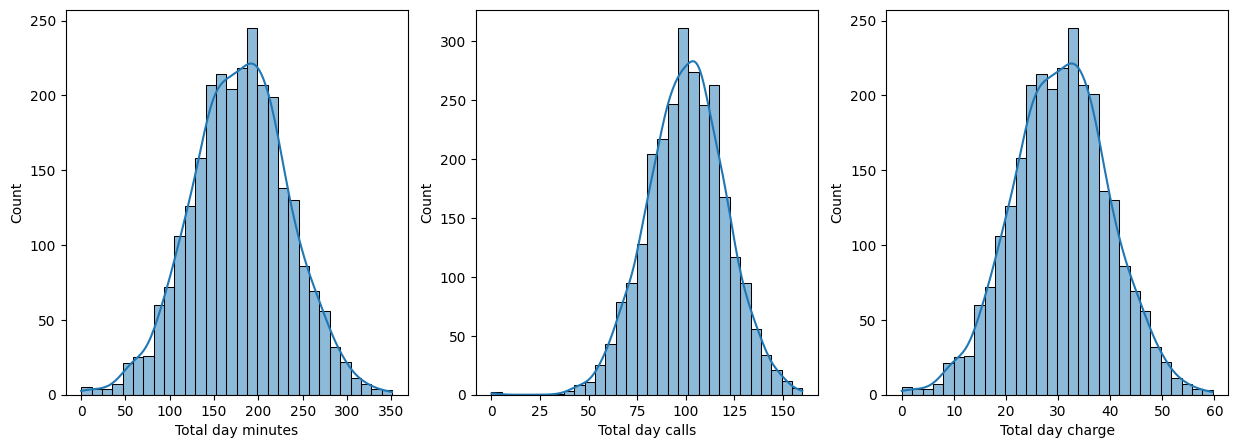

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df["Total day minutes"], bins=30, kde=True, ax=axes[0])
sns.histplot(df["Total day calls"], bins=30, kde=True, ax=axes[1])
sns.histplot(df["Total day charge"], bins=30, kde=True, ax=axes[2])

It can be seen that the minutes, calls, and charges appear to follow a bell curve, although they all show a slight left-skewed distribution. Likewise, some outliers and the mode of each value can be observed, as well as why the statistical data shown above was obtained.

<Axes: xlabel='Total eve charge', ylabel='Count'>

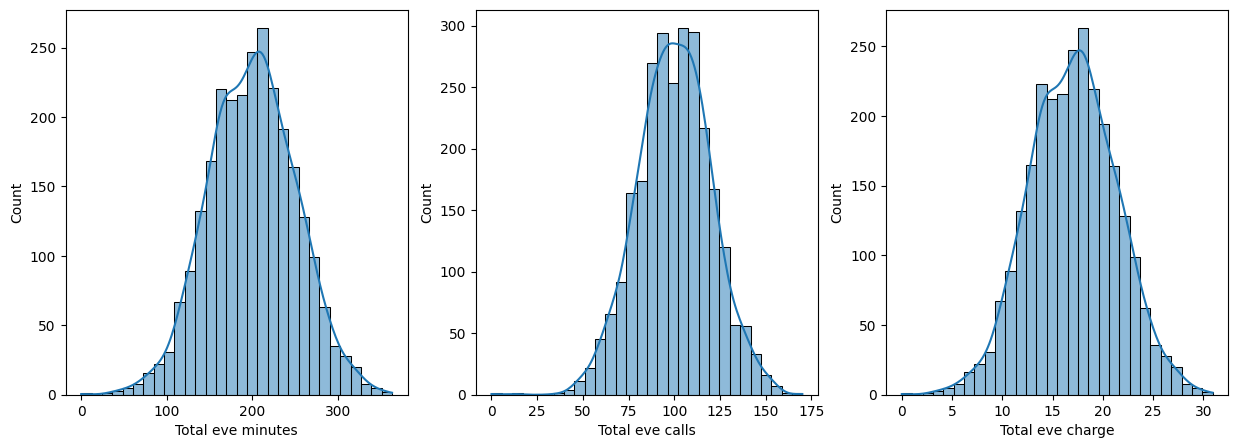

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df["Total eve minutes"], bins=30, kde=True, ax=axes[0])
sns.histplot(df["Total eve calls"], bins=30, kde=True, ax=axes[1])
sns.histplot(df["Total eve charge"], bins=30, kde=True, ax=axes[2])

A similar behavior to that of the daily records can be observed, however, the IQR ranges or the bell curve are smaller, which would indicate less variability in the data or when calculating the empirical rule or the 2.5 and 97.5 quantiles. However, for calls and charges, because the minutes showed a standard deviation similar to that of night and day, what happens in the afternoon should be visualized and better understood.

<Axes: xlabel='Total night charge', ylabel='Count'>

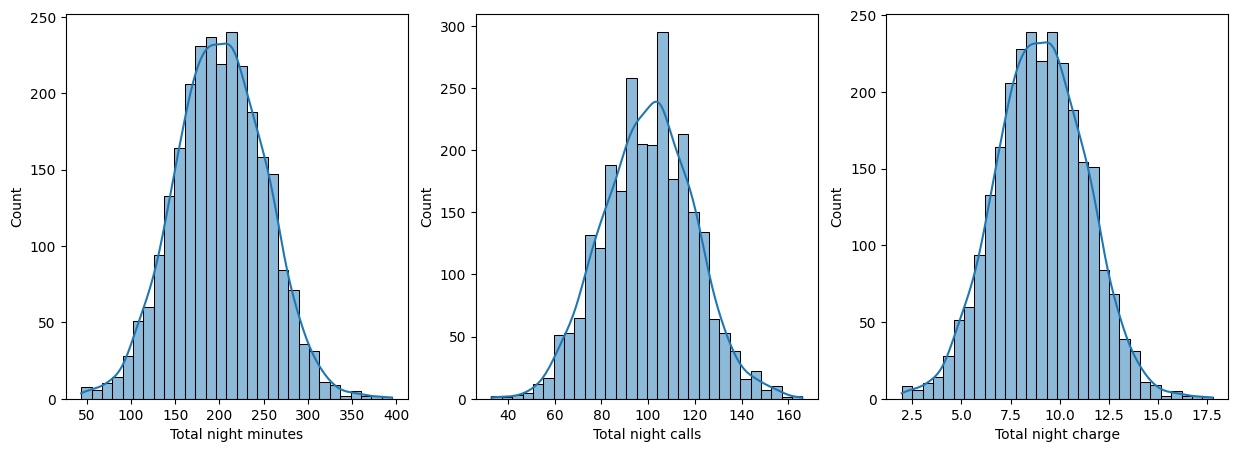

In [9]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df["Total night minutes"], bins=30, kde=True, ax=axes[0])
sns.histplot(df["Total night calls"], bins=30, kde=True, ax=axes[1])
sns.histplot(df["Total night charge"], bins=30, kde=True, ax=axes[2])

Both minutes and calls and charges have symmetrical distributions close to normal. Most customers make around 200 minutes and 100 calls during the night, indicating that this time slot is used consistently by the user base; churns do not appear to be due to this reason.

<Axes: xlabel='Total intl charge', ylabel='Count'>

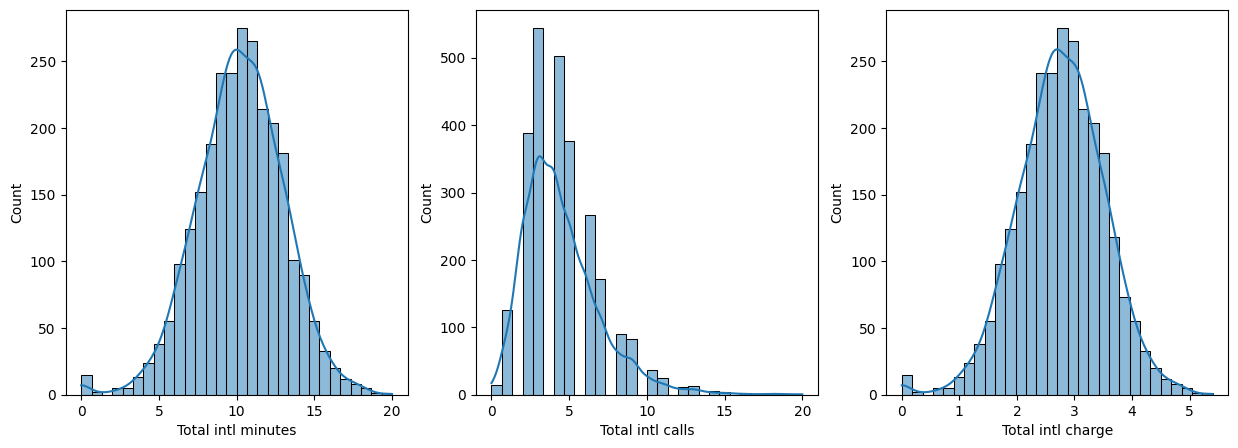

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df["Total intl minutes"], bins=30, kde=True, ax=axes[0])
sns.histplot(df["Total intl calls"], bins=30, kde=True, ax=axes[1])
sns.histplot(df["Total intl charge"], bins=30, kde=True, ax=axes[2])

This grphs are amazing. International minutes follow an almost normal distribution, concentrated around 10 minutes, reflecting that most customers use this service moderately. In contrast, the number of international calls shows a right-skewed distribution, with the vast majority of customers making between two and six calls per month, while only a few customers make more than ten, becoming outliers. This indicates that the international service is not massive and that its intensive use is concentrated in a small group of users. Finally, international charges reflect the same trend as minutes, as they are calculated directly using the per-minute rate, showing an average of close to three dollars. Taken together, the data suggest that customers tend to make few calls but of longer duration.

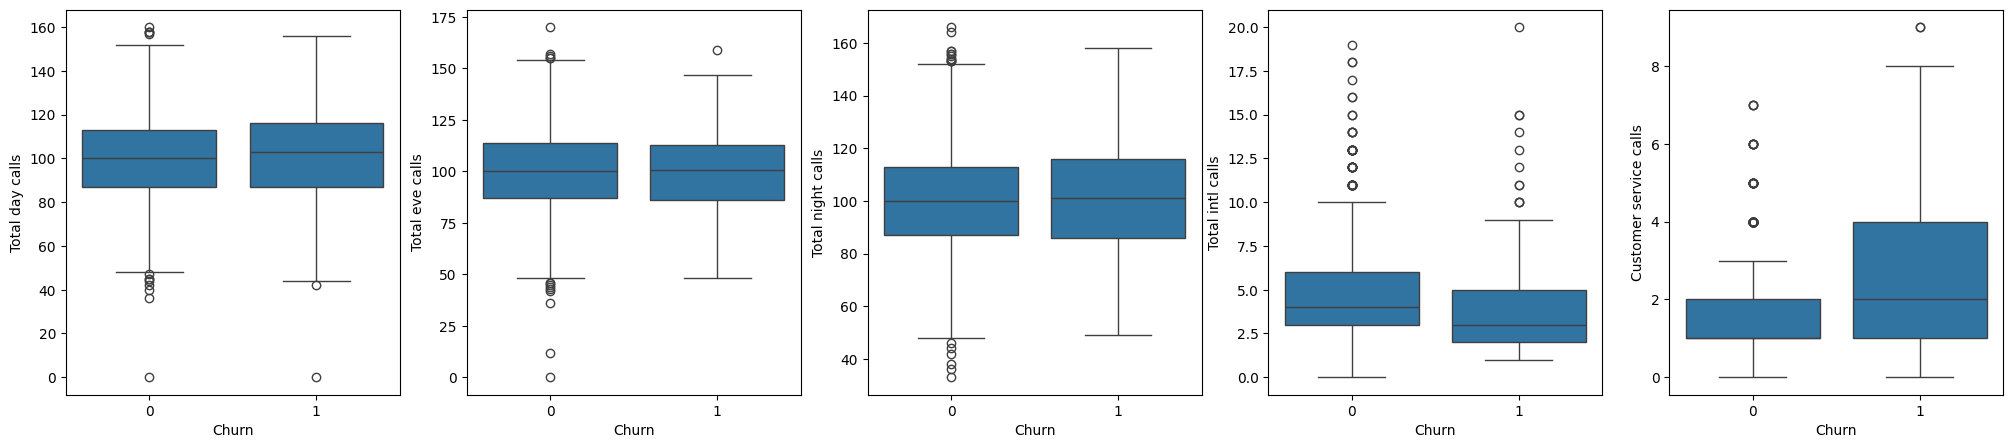

In [11]:
fig, axes = plt.subplots(1, 5, figsize=(25,5))
sns.boxplot(data=data, y="Total day calls", x="Churn", ax=axes[0])
sns.boxplot(data=data, y="Total eve calls", x="Churn", ax=axes[1])
sns.boxplot(data=data, y="Total night calls", x="Churn", ax=axes[2])
sns.boxplot(data=data, y="Total intl calls", x="Churn", ax=axes[3])
sns.boxplot(data=data, y="Customer service calls", x="Churn", ax=axes[4])
plt.show()

What has already been established statistically and by histograms can be observed in another visual way. However, with the boxplot, we can better see where it is skewed by the size of its whiskers, as well as visually see if the behavior or records have different behavior between churn and non-churn. In addition, and more importantly, we can better observe the possible outliers present in the sample that should be addressed.

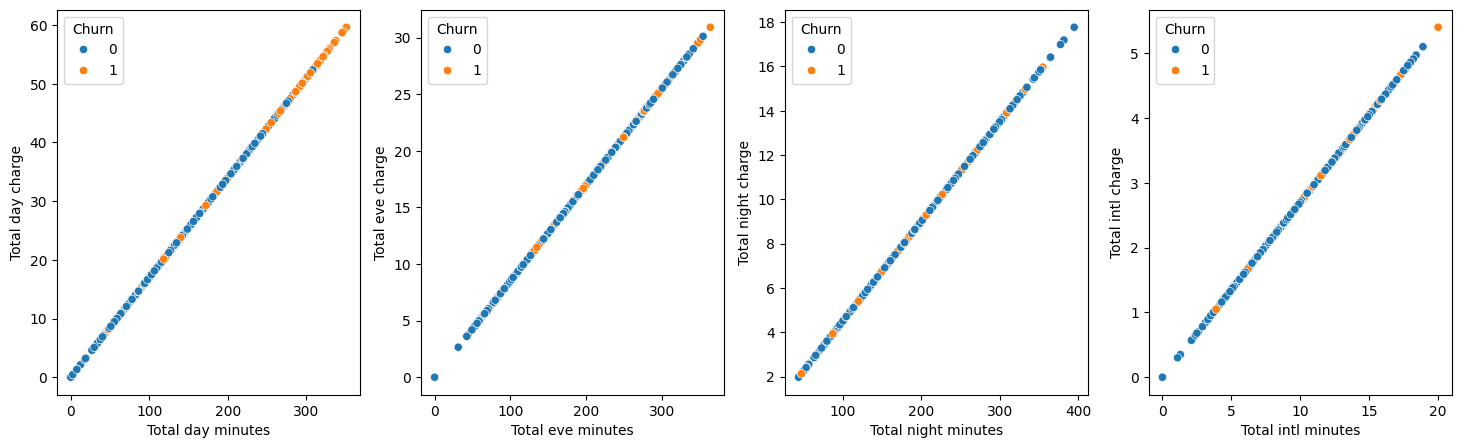

In [12]:
fig, axes = plt.subplots(1, 4, figsize=(18,5))
sns.scatterplot(data=data, x='Total day minutes', y='Total day charge', hue='Churn', ax=axes[0])
sns.scatterplot(data=data, x='Total eve minutes', y='Total eve charge', hue='Churn', ax=axes[1])
sns.scatterplot(data=data, x='Total night minutes', y='Total night charge', hue='Churn', ax=axes[2])
sns.scatterplot(data=data, x='Total intl minutes', y='Total intl charge', hue='Churn',ax=axes[3])
plt.show()
#to visualize if it's a data is out of the normal behavior

International minutes follow an almost normal distribution, concentrated around 10 minutes, reflecting that most customers use this service moderately. In contrast, the number of international calls shows a right-skewed distribution, with the vast majority of customers making between two and six calls per month, while only a few customers make more than ten, becoming outliers. This indicates that the international service is not massive and that its intensive use is concentrated in a small group of users. Finally, international charges reflect the same trend as minutes, as they are calculated directly using the per-minute rate, showing an average of close to three dollars. Taken together, the data suggest that customers tend to make few calls but of longer duration

# Outliers

As we say before, in the dataset exist outliers that need to be treatment, in this section we will do it with quantiles formula

In [13]:
# Identifying outliers using IQR formula

# Select numerical columns (excluding binary/categorical ones already mapped)
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()
# Remove columns that are essentially categorical or binary after mapping
numerical_cols.remove('International plan')
numerical_cols.remove('Voice mail plan')
numerical_cols.remove('Churn')


print("Identifying outliers using IQR:")
data_clean= data.copy()
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
# outliers formula
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)] # | to apply the or command by each element in the column
    data_clean = data_clean[(data_clean[col]>= lower_bound) & (data_clean[col]<=upper_bound)] # & to apply the comman and for each element

    print(f"\nPotential outliers in '{col}':")
    print(outliers[[col, 'Churn']].head()) # Displaying the column with outliers and Churn status
    print(f"Number of outliers: {len(outliers)}")

Identifying outliers using IQR:

Potential outliers in 'Account length':
      Account length  Churn
246              209      0
338              224      1
644              243      0
864              210      0
1092             212      0
Number of outliers: 12

Potential outliers in 'Number vmail messages':
      Number vmail messages  Churn
2188                     50      0
2323                     50      0
Number of outliers: 2

Potential outliers in 'Total day minutes':
     Total day minutes  Churn
128              337.4      1
296              350.8      1
485              335.5      1
540               30.9      0
582               34.0      0
Number of outliers: 21

Potential outliers in 'Total day calls':
      Total day calls  Churn
252               158      0
544                36      0
581                40      0
836               158      0
1040               42      1
Number of outliers: 18

Potential outliers in 'Total day charge':
     Total day charge  Churn
128

In [14]:
print("Dataset before clean process", data.shape)
print("Dataset after clean process", data_clean.shape)

Dataset before clean process (2666, 20)
Dataset after clean process (2246, 20)


In [15]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2246 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   State                   2246 non-null   category
 1   Account length          2246 non-null   int64   
 2   Area code               2246 non-null   object  
 3   International plan      2246 non-null   int64   
 4   Voice mail plan         2246 non-null   int64   
 5   Number vmail messages   2246 non-null   int64   
 6   Total day minutes       2246 non-null   float64 
 7   Total day calls         2246 non-null   int64   
 8   Total day charge        2246 non-null   float64 
 9   Total eve minutes       2246 non-null   float64 
 10  Total eve calls         2246 non-null   int64   
 11  Total eve charge        2246 non-null   float64 
 12  Total night minutes     2246 non-null   float64 
 13  Total night calls       2246 non-null   int64   
 14  Total night charge      2246 

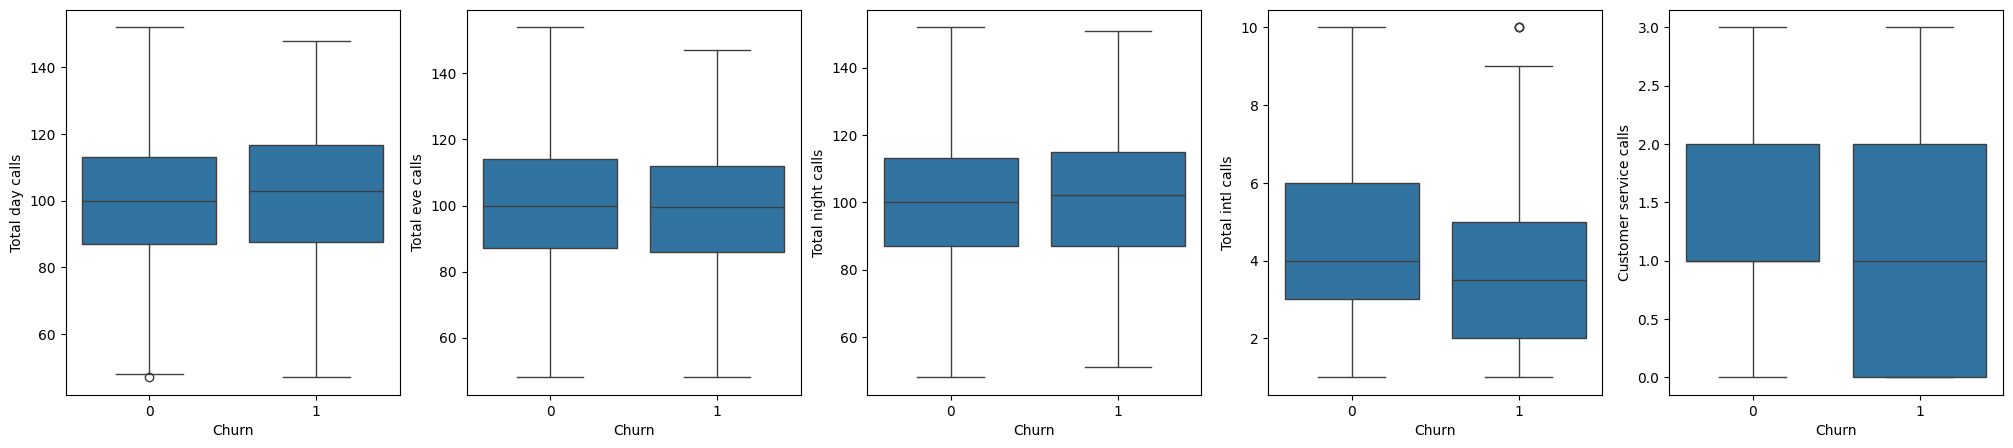

In [ ]:
# to visualize if the outliers disappear from boxplots
fig, axes = plt.subplots(1, 5, figsize=(25,5))
sns.boxplot(data=data_clean, y="Total day calls", x="Churn", ax=axes[0])
sns.boxplot(data=data_clean, y="Total eve calls", x="Churn", ax=axes[1])
sns.boxplot(data=data_clean, y="Total night calls", x="Churn", ax=axes[2])
sns.boxplot(data=data_clean, y="Total intl calls", x="Churn", ax=axes[3])
sns.boxplot(data=data_clean, y="Customer service calls", x="Churn", ax=axes[4])
plt.show()

Once the treatment process has been completed, redraw the box plot to check whether the resulting dataset has fewer outliers, which was the case. Now, the data that can be extracted from this may be less affected by extreme values that could skew the analysis.

In [ ]:
#get clean data set to use in SQL
#data_clean.to_csv("churn_clean.csv", index=False)
#data_clean.to_json("churn_clean.json", orient="records", lines=False)